In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip = zipfile.ZipFile("/content/drive/MyDrive/data/archive.zip")
zip.extractall()
zip.close()

In [ ]:
import os
for dirpath, dirname, filename in os.walk("Alzheimer_s Dataset"):
  print(f"There are {len(dirname)} directories and {len(filename)} files in path: {dirpath}")

There are 2 directories and 0 files in path: Alzheimer_s Dataset
There are 4 directories and 0 files in path: Alzheimer_s Dataset/test
There are 0 directories and 640 files in path: Alzheimer_s Dataset/test/NonDemented
There are 0 directories and 179 files in path: Alzheimer_s Dataset/test/MildDemented
There are 0 directories and 448 files in path: Alzheimer_s Dataset/test/VeryMildDemented
There are 0 directories and 12 files in path: Alzheimer_s Dataset/test/ModerateDemented
There are 4 directories and 0 files in path: Alzheimer_s Dataset/train
There are 0 directories and 2560 files in path: Alzheimer_s Dataset/train/NonDemented
There are 0 directories and 717 files in path: Alzheimer_s Dataset/train/MildDemented
There are 0 directories and 1792 files in path: Alzheimer_s Dataset/train/VeryMildDemented
There are 0 directories and 52 files in path: Alzheimer_s Dataset/train/ModerateDemented


In [ ]:
train_dir = "Alzheimer_s Dataset/train"
test_dir = "Alzheimer_s Dataset/test"

In [ ]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/225.)
test_datagen = ImageDataGenerator(rescale = 1/225.)

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (208, 176),
                                               class_mode = "categorical",
                                               shuffle = True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size = 32,
                                             target_size = (208, 176),
                                             class_mode = "categorical",
                                             shuffle = True)


Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
images, labels = train_data.next()

In [ ]:
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

161

['mildDem240.jpg']
shape: (208, 176)


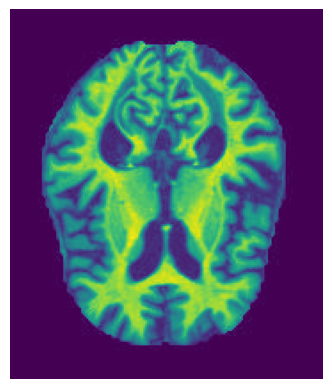

In [ ]:
import matplotlib.image as mpimg
import random
path= "Alzheimer_s Dataset/train/MildDemented"
random_img = random.sample(os.listdir(path),1)
print(random_img)
img = mpimg.imread(path+"/"+random_img[0])
plt.imshow(img)
plt.axis(False)
print(f"shape: {img.shape}")

In [ ]:
# # Building a CNN model
# import tensorflow as tf
# from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense

# model = tf.keras.Sequential([
#     hub.KerasLayer("https://tfhub.dev/google/efficientnet/b0/feature-vector/1",
#                    trainable = False,
#                    name = "feature_extraction_layer",
#                    input_shape = (208, 176, 3)),
#     tf.keras.layers.Dense(4, activation = "softmax")
# ])
# model.compile(loss = "categorical_crossentropy",
#               optimizer = tf.keras.optimizers.Adam(learning_rate =0.01),
#               metrics = ["accuracy"])
# history = model.fit(train_data,
#           epochs = 50,
#           steps_per_epoch=len(train_data),
#           validation_data = test_data,
#           validation_steps = int(0.25 * len(test_data)))

In [ ]:
# model.evaluate(test_data)

In [ ]:
# model.save("model.h5")

In [ ]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode = 'categorical',
                                                                image_size = (208, 176))

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = 'categorical',
                                                                image_size = (208, 176))

Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomWidth(0.2),
  tf.keras.layers.RandomFlip('horizontal')
])

In [ ]:
input_shape = (208, 176, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = input_shape, name = "input_layer")
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(4, activation = 'softmax')(x)

model_1 = tf.keras.Model(inputs,outputs)

In [ ]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = "Adam",
                metrics = ["accuracy"])
history = model_1.fit(train_data,
            epochs = 5,
            validation_data = test_data,
            validation_steps = int(0.15 *len(test_data)))

Epoch 1/5
161/161 [==============================] - 27s 124ms/step - loss: 0.9818 - accuracy: 0.5315 - val_loss: 1.1928 - val_accuracy: 0.3854
Epoch 2/5
161/161 [==============================] - 10s 59ms/step - loss: 0.9267 - accuracy: 0.5536 - val_loss: 1.0934 - val_accuracy: 0.4271
Epoch 3/5
161/161 [==============================] - 9s 56ms/step - loss: 0.9058 - accuracy: 0.5667 - val_loss: 1.0081 - val_accuracy: 0.5417
Epoch 4/5
161/161 [==============================] - 9s 58ms/step - loss: 0.8940 - accuracy: 0.5729 - val_loss: 1.0838 - val_accuracy: 0.4531
Epoch 5/5
161/161 [==============================] - 10s 58ms/step - loss: 0.8805 - accuracy: 0.5843 - val_loss: 1.0492 - val_accuracy: 0.4583


In [ ]:
initial_epoch = 5
current_epoch = initial_epoch + 5
base_model.trainable = True

In [ ]:
for i in base_model.layers[:-5]:
  i.trainable = False

In [ ]:
for layer in base_model.layers:
  print(layer.name, layer.trainable)

input_8 False
rescaling_14 False
normalization_7 False
rescaling_15 False
stem_conv_pad False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv_pad False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2

In [ ]:
for layer in model_1.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7945a4429870> True
<keras.engine.sequential.Sequential object at 0x7945f28622c0> True
<keras.engine.functional.Functional object at 0x79461b3e6950> True
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x79461b752d40> True
<keras.layers.core.dense.Dense object at 0x79459c78b610> True


In [ ]:
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                metrics = ['accuracy'])
history_1 = model_1.fit(train_data,
            epochs = current_epoch,
            validation_data = test_data,
            validation_steps = int(0.15 * len(test_data)),
            initial_epoch = history.epoch[-1])

Epoch 5/10
161/161 [==============================] - 20s 77ms/step - loss: 0.8716 - accuracy: 0.5850 - val_loss: 1.0242 - val_accuracy: 0.5000
Epoch 6/10
161/161 [==============================] - 10s 62ms/step - loss: 0.8559 - accuracy: 0.5929 - val_loss: 1.0422 - val_accuracy: 0.4844
Epoch 7/10
161/161 [==============================] - 10s 62ms/step - loss: 0.8532 - accuracy: 0.5917 - val_loss: 1.0707 - val_accuracy: 0.4427
Epoch 8/10
161/161 [==============================] - 9s 56ms/step - loss: 0.8405 - accuracy: 0.5991 - val_loss: 1.2001 - val_accuracy: 0.4688
Epoch 9/10
161/161 [==============================] - 10s 61ms/step - loss: 0.8303 - accuracy: 0.6134 - val_loss: 1.0318 - val_accuracy: 0.4896
Epoch 10/10
161/161 [==============================] - 10s 63ms/step - loss: 0.8147 - accuracy: 0.6210 - val_loss: 1.2120 - val_accuracy: 0.4792


In [ ]:
model_1.evaluate(test_data)

40/40 [==============================] - 3s 61ms/step - loss: 1.0839 - accuracy: 0.5395


[1.0838693380355835, 0.5394839644432068]